Links to the datasets:

https://www.kaggle.com/saurabh00007/diabetescsv

https://www.kaggle.com/johnsmith88/heart-disease-dataset


1. Implement k-Nearest Neighbor algorithm for classifying a heart dataset.
2. Implement k-Means clustering algorithm on diabetic dataset.
3. Implement linear SVM with iris dataset. Consider two classes of Iris dataset which consists of three classes by removing one of the classes.

Use appropriate plots such as barplot,violinplot and also make a plot comparing the effecieny of the algorithms for different test cases

In [ ]:
#KNN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Rishabh Johri\Downloads\heart-disease-dataset\heart.csv")

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

In [6]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

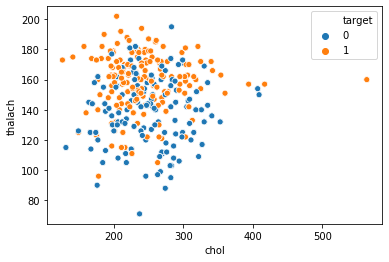

In [7]:
sns.scatterplot(x="chol",y="thalach",data=df,hue="target")

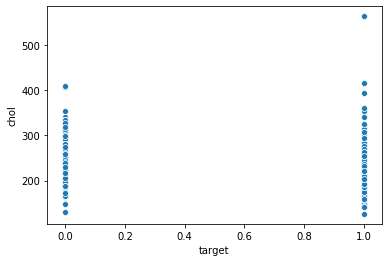

In [8]:
sns.scatterplot(x="target",y="chol",data=df)

In [9]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(df.drop('target',axis=1))
ssm=ss.transform(df.drop('target',axis=1))
sfd= pd.DataFrame(ssm,columns=df.columns[:-1])
sfd.head()

age       sex        cp  trestbps      chol       fbs   restecg  \
0 -0.268437  0.661504 -0.915755 -0.377636 -0.659332 -0.418878  0.891255   
1 -0.158157  0.661504 -0.915755  0.479107 -0.833861  2.387330 -1.004049   
2  1.716595  0.661504 -0.915755  0.764688 -1.396233 -0.418878  0.891255   
3  0.724079  0.661504 -0.915755  0.936037 -0.833861 -0.418878  0.891255   
4  0.834359 -1.511706 -0.915755  0.364875  0.930822  2.387330  0.891255   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.821321 -0.712287 -0.060888  0.995433  1.209221  1.089852  
1  0.255968  1.403928  1.727137 -2.243675 -0.731971  1.089852  
2 -1.048692  1.403928  1.301417 -2.243675 -0.731971  1.089852  
3  0.516900 -0.712287 -0.912329  0.995433  0.238625  1.089852  
4 -1.874977 -0.712287  0.705408 -0.624121  2.179817 -0.522122

In [10]:
from sklearn.model_selection import train_test_split

In [16]:
X=sfd
y=df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
er=[]
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pre_i = knn.predict(X_test)
    er.append(np.mean(pre_i != y_test))

In [18]:
er

[0.011799410029498525,
 0.05014749262536873,
 0.07964601769911504,
 0.14749262536873156,
 0.1887905604719764,
 0.17699115044247787,
 0.12684365781710916,
 0.14454277286135694,
 0.1710914454277286,
 0.1592920353982301,
 0.16224188790560473,
 0.1504424778761062,
 0.1504424778761062,
 0.16224188790560473,
 0.17404129793510326,
 0.17994100294985252,
 0.18289085545722714,
 0.18584070796460178,
 0.17404129793510326,
 0.17404129793510326,
 0.1710914454277286,
 0.15339233038348082,
 0.13569321533923304,
 0.12684365781710916,
 0.15634218289085547,
 0.16519174041297935,
 0.16519174041297935,
 0.1710914454277286,
 0.1710914454277286,
 0.17404129793510326,
 0.1710914454277286,
 0.1710914454277286,
 0.15634218289085547,
 0.1504424778761062,
 0.14749262536873156,
 0.1504424778761062,
 0.1504424778761062,
 0.1504424778761062,
 0.15634218289085547]

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
#kmeans clustering

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df=pd.read_csv(r"C:\Users\Rishabh Johri\Downloads\diabetescsv\diabetes.csv")

In [29]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

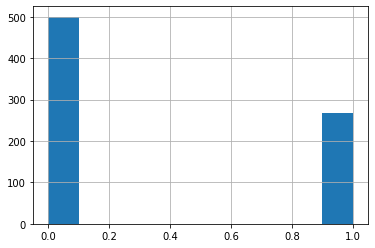

In [30]:
df["Outcome"].hist()

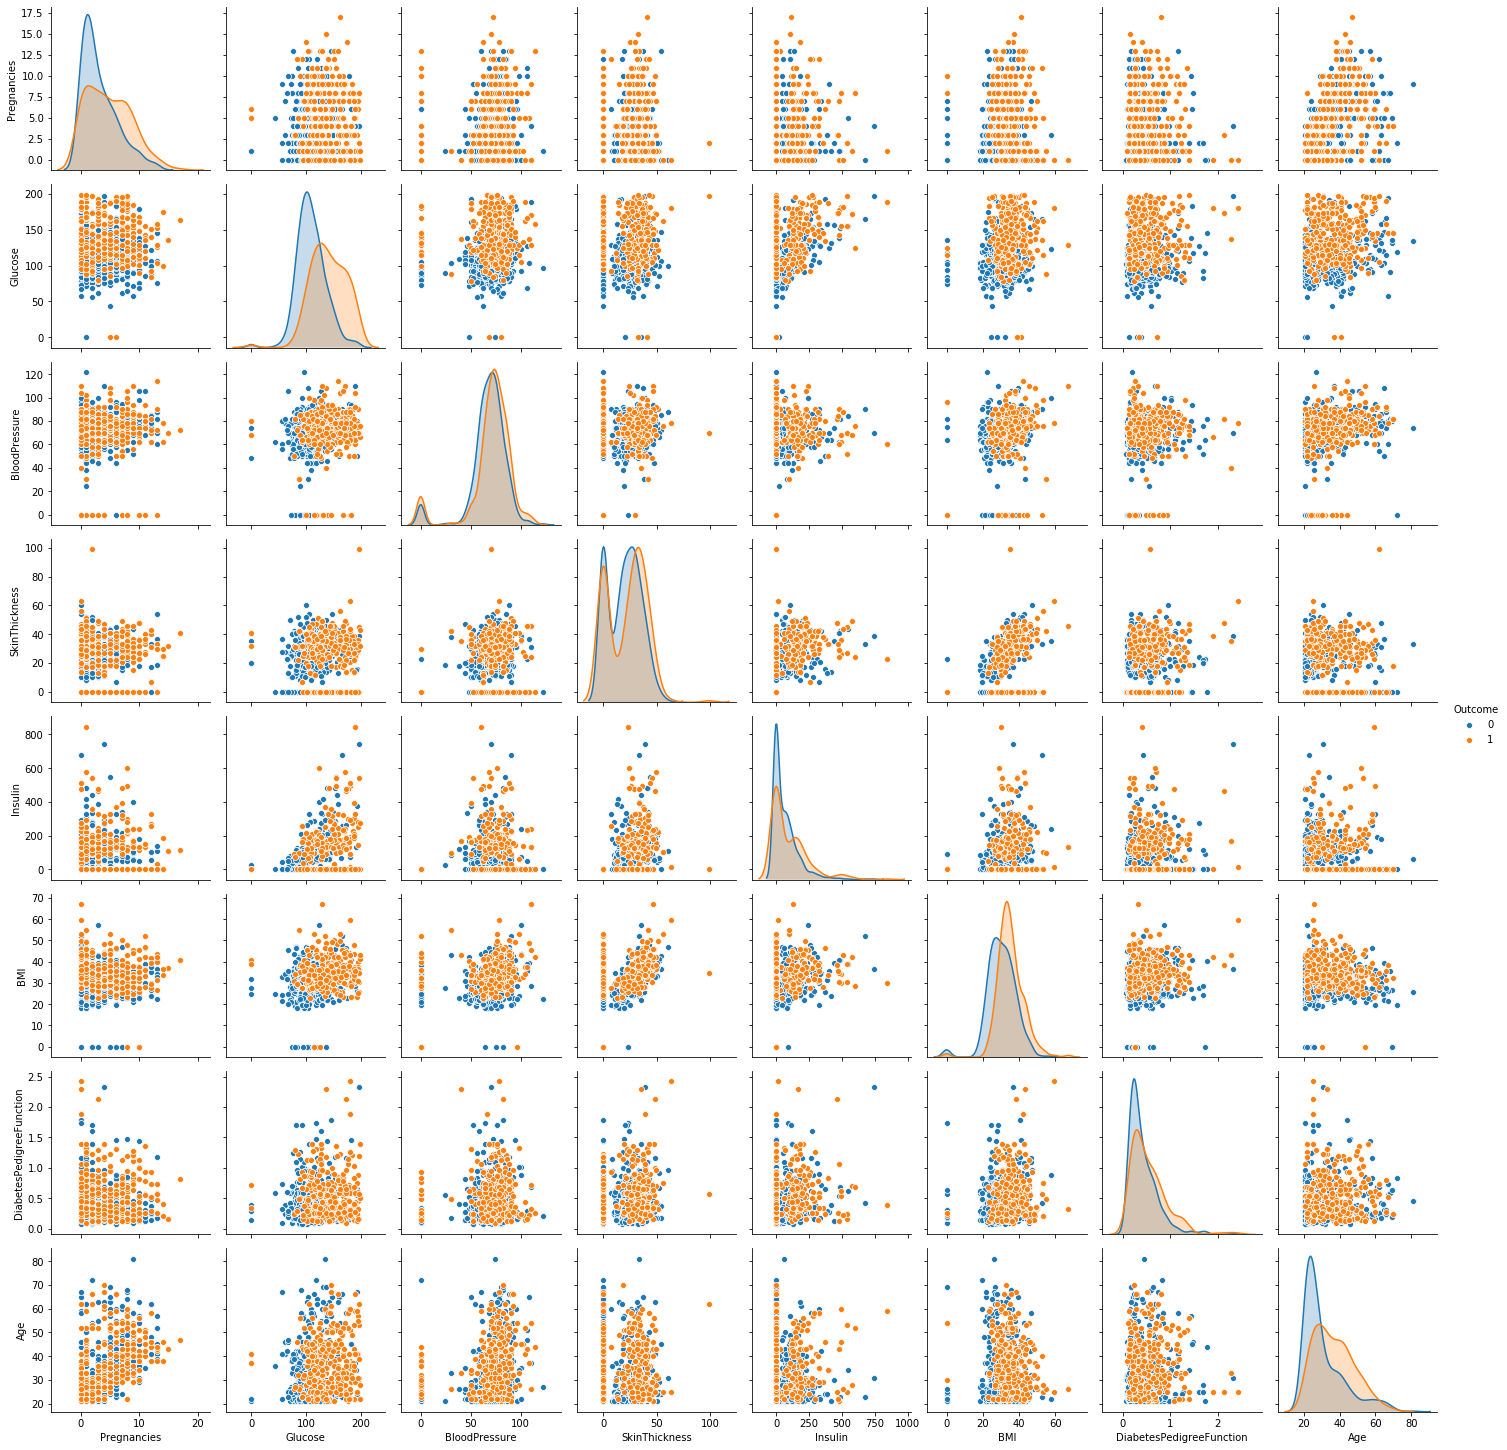

In [31]:
sns.pairplot(df,hue="Outcome")

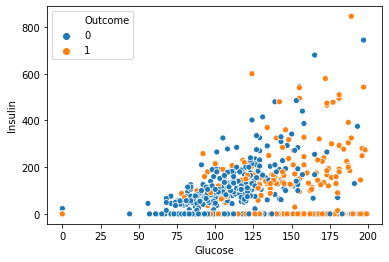

In [32]:
sns.scatterplot(x="Glucose",y="Insulin",data=df,hue="Outcome")

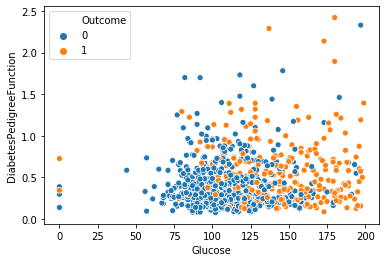

In [33]:
sns.scatterplot(x="Glucose",y="DiabetesPedigreeFunction",data=df,hue="Outcome")

In [34]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
km.fit(df.drop("Outcome",axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
km.cluster_centers_

array([[  3.7030303 , 141.46060606,  72.78787879,  31.2       ,
        253.70909091,  34.98545455,   0.59724848,  33.7030303 ],
       [  3.88391376, 115.26699834,  68.09784411,  17.6185738 ,
         32.21227197,  31.17363184,   0.43757048,  33.11442786]])

In [36]:
km.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(confusion_matrix(df["Outcome"],km.labels_))

[[ 79 421]
 [ 86 182]]


In [39]:
print(classification_report(df["Outcome"],km.labels_))

              precision    recall  f1-score   support

           0       0.48      0.16      0.24       500
           1       0.30      0.68      0.42       268

    accuracy                           0.34       768
   macro avg       0.39      0.42      0.33       768
weighted avg       0.42      0.34      0.30       768



In [40]:
#SVM iris datset

In [41]:
dfp=sns.load_dataset("iris")
dfp.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [42]:
dfp["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [43]:
x=dfp[dfp["species"]=="setosa"]
y=dfp[dfp["species"]=="virginica"]
m=pd.concat([x,y])
m["species"].value_counts()

virginica    50
setosa       50
Name: species, dtype: int64

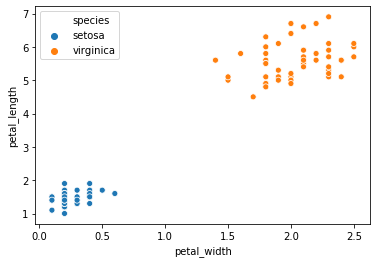

In [44]:
sns.scatterplot(x="petal_width",y="petal_length",hue="species",data=m)

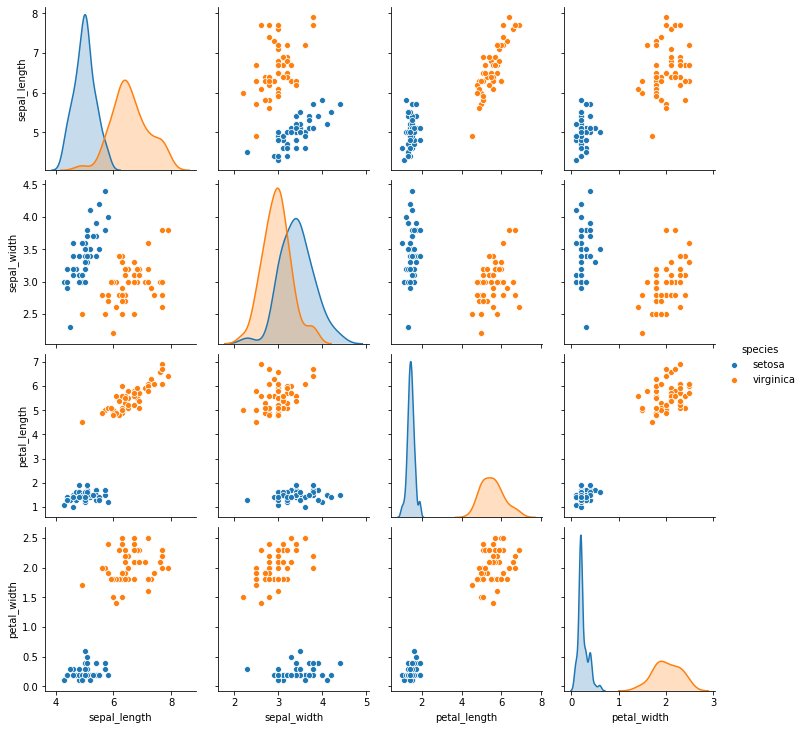

In [45]:
sns.pairplot(hue="species",data=m)

In [46]:
X=m.drop("species",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,m["species"], test_size=0.33, random_state=101)

In [47]:
from sklearn.svm import SVC
sv=SVC(gamma="auto")
sv.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
pre=sv.predict(X_test)
confusion_matrix(y_test,pre)

array([[18,  0],
       [ 0, 15]], dtype=int64)